In [2]:
# # Install and load required libraries
# install.packages("ggplot2")  # For data visualization
# install.packages("dplyr")    # For data manipulation
# install.packages("corrplot") # For correlation plot
# install.packages("factoextra") # For factor analysis visualization

# Load the libraries
library(ggplot2)
library(dplyr)
library(corrplot)
library(factoextra)
# Increase overall plot size in Jupyter Notebook
options(repr.plot.width=15, repr.plot.height=12) # Adjust width and height as needed




## Read Data

In [152]:
# Replace "data.csv" with the actual file path if needed
data <- read.csv("data/gene1.csv", header = TRUE)
name <- colnames(data)[1]
colnames(data)[1] <- "Genotype"
name
unique(data$Genotype)

[1] "MDR1_C3435T"

[1] "CT" ""   "CC" "TT"

In [153]:
genotype_mapping <- c("CC" = 0, "CT" = 1, "TT" = 2)

In [154]:
head(data,12)

,Genotype,cholesterol,LP.CH3.,leucine,isoleucine.2,valine.2,Propylene.glycol,LP..CH2.,lactate.1,alanine,⋯,ornithine,methanol,ethanol.3,creatine,creatinine.2,proline,LP..CHOCOR.,glucose.3,LP..CH.of.unsaturated.lipids.,formate
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CT,4.801760,1.0337851,0.2150345,0.1988120,0.5645557,0.02710468,0.7748378,2.185551,0.4191485,⋯,0.06527740,0.06758122,0.3347223,0.06185075,0.11501243,0.5240824,0.01703870,7.809120,0.8574244,0.013525366
2,,5.020672,1.5410120,0.2512111,0.2673241,0.7214541,0.03557965,4.7331201,5.805840,0.7343500,⋯,0.10969425,0.06850789,0.2980445,0.10084939,0.12833416,0.9027457,0.14624472,9.578028,1.9258537,0.010530889
3,CC,4.028921,0.9753014,0.2198873,0.2077222,0.5890511,0.02062162,0.5538863,2.764434,0.3413103,⋯,0.14159558,0.10456548,0.2626267,0.04027246,0.13609702,0.8098089,0.01345203,8.025012,0.8232556,0.011803694
4,CC,4.088934,1.0269344,0.1463315,0.1307535,0.4635374,0.02670106,1.0609747,1.672996,0.5625179,⋯,0.08173559,0.05517203,0.3040151,0.03021873,0.09437715,0.4471208,0.03078452,7.456489,0.9938315,0.011115286
5,CT,4.808729,1.1492197,0.3660061,0.3831550,1.0477774,0.02868905,3.1225500,4.987227,0.5487608,⋯,0.20173111,0.06429076,0.3326889,0.04044225,0.12470346,1.1219126,0.07720922,9.606366,1.4407569,0.014706321
6,TT,7.368570,1.5516188,0.1809434,0.1658205,0.5006819,0.02541088,1.1615390,1.776223,0.4302581,⋯,0.09190776,0.07238067,0.3978596,0.05629534,0.10512331,0.5175658,0.02529048,8.781926,1.3830974,0.016972064
7,TT,3.215907,1.0626333,0.2619514,0.2157017,0.6660439,0.03157446,2.6477258,2.931937,0.4248233,⋯,0.13693163,0.08576977,0.1683247,0.02944984,0.17849583,0.5767089,0.07642840,7.547484,1.0729032,0.053045703
8,TT,3.051552,0.7964832,0.1678868,0.1474764,0.4321298,0.02171188,2.3202277,1.734147,0.5617446,⋯,0.08791308,0.08808952,0.2302486,0.04857054,0.11138125,0.6548234,0.06244996,8.009470,0.8693780,0.009853449
9,,5.408864,1.4880584,0.2761881,0.2659974,0.6865120,0.02325931,4.2507981,8.802316,0.8059945,⋯,0.24186348,0.07965629,0.4921007,0.04391251,0.15869754,0.7861226,0.12133191,5.469601,1.8777509,0.054445514


In [155]:
dim(data)

[1] 266  28

In [156]:
data <- data[data[, 1] != "", ]

In [157]:
dim(data)

[1] 171  28

In [158]:
data$Genotype <- genotype_mapping[data[, 1]]
head(data,12)

,Genotype,cholesterol,LP.CH3.,leucine,isoleucine.2,valine.2,Propylene.glycol,LP..CH2.,lactate.1,alanine,⋯,ornithine,methanol,ethanol.3,creatine,creatinine.2,proline,LP..CHOCOR.,glucose.3,LP..CH.of.unsaturated.lipids.,formate
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,4.801760,1.0337851,0.2150345,0.1988120,0.5645557,0.02710468,0.7748378,2.185551,0.4191485,⋯,0.06527740,0.06758122,0.3347223,0.06185075,0.11501243,0.5240824,0.01703870,7.809120,0.8574244,0.013525366
3,0,4.028921,0.9753014,0.2198873,0.2077222,0.5890511,0.02062162,0.5538863,2.764434,0.3413103,⋯,0.14159558,0.10456548,0.2626267,0.04027246,0.13609702,0.8098089,0.01345203,8.025012,0.8232556,0.011803694
4,0,4.088934,1.0269344,0.1463315,0.1307535,0.4635374,0.02670106,1.0609747,1.672996,0.5625179,⋯,0.08173559,0.05517203,0.3040151,0.03021873,0.09437715,0.4471208,0.03078452,7.456489,0.9938315,0.011115286
5,1,4.808729,1.1492197,0.3660061,0.3831550,1.0477774,0.02868905,3.1225500,4.987227,0.5487608,⋯,0.20173111,0.06429076,0.3326889,0.04044225,0.12470346,1.1219126,0.07720922,9.606366,1.4407569,0.014706321
6,2,7.368570,1.5516188,0.1809434,0.1658205,0.5006819,0.02541088,1.1615390,1.776223,0.4302581,⋯,0.09190776,0.07238067,0.3978596,0.05629534,0.10512331,0.5175658,0.02529048,8.781926,1.3830974,0.016972064
7,2,3.215907,1.0626333,0.2619514,0.2157017,0.6660439,0.03157446,2.6477258,2.931937,0.4248233,⋯,0.13693163,0.08576977,0.1683247,0.02944984,0.17849583,0.5767089,0.07642840,7.547484,1.0729032,0.053045703
8,2,3.051552,0.7964832,0.1678868,0.1474764,0.4321298,0.02171188,2.3202277,1.734147,0.5617446,⋯,0.08791308,0.08808952,0.2302486,0.04857054,0.11138125,0.6548234,0.06244996,8.009470,0.8693780,0.009853449
10,0,3.532075,0.9375108,0.1733835,0.1396726,0.4181516,0.01908520,0.6623882,5.508949,0.6209484,⋯,0.13975863,0.05089936,0.3587085,0.06500520,0.09571331,0.6484434,0.02394916,6.190909,0.7792030,0.047120105
11,1,3.397296,0.7440102,0.1801058,0.1521376,0.5879404,0.04090092,1.0260215,5.429104,0.6063170,⋯,0.09172310,0.07015005,0.2448536,0.06086058,0.13551102,0.5938796,0.02582451,7.958270,0.6229083,0.045898847


In [159]:
# Convert all columns with character data to numeric
data <- data %>%
  mutate_if(is.character, as.numeric)

# Check if any columns still have NAs after the conversion
columns_with_na <- colnames(data)[apply(is.na(data), 2, any)]
columns_with_na

character(0)

## Data Exploration and Visualization

In [160]:
summary(data)

    Genotype      cholesterol        LP.CH3.          leucine       
 Min.   :0.000   Min.   : 1.513   Min.   :0.5802   Min.   :0.08842  
 1st Qu.:1.000   1st Qu.: 3.420   1st Qu.:0.9488   1st Qu.:0.17188  
 Median :1.000   Median : 4.061   Median :1.2889   Median :0.20356  
 Mean   :1.152   Mean   : 4.237   Mean   :1.2794   Mean   :0.20254  
 3rd Qu.:2.000   3rd Qu.: 4.839   3rd Qu.:1.5426   3rd Qu.:0.23189  
 Max.   :2.000   Max.   :13.131   Max.   :3.0658   Max.   :0.36601  
  isoleucine.2        valine.2      Propylene.glycol     LP..CH2.      
 Min.   :0.05622   Min.   :0.2704   Min.   :0.01128   Min.   : 0.4955  
 1st Qu.:0.14328   1st Qu.:0.5006   1st Qu.:0.02124   1st Qu.: 1.1921  
 Median :0.17003   Median :0.5646   Median :0.02487   Median : 2.2067  
 Mean   :0.17757   Mean   :0.5689   Mean   :0.02528   Mean   : 2.4893  
 3rd Qu.:0.20660   3rd Qu.:0.6385   3rd Qu.:0.02885   3rd Qu.: 3.1293  
 Max.   :0.41548   Max.   :1.0478   Max.   :0.04915   Max.   :14.7140  
   lactate.1 

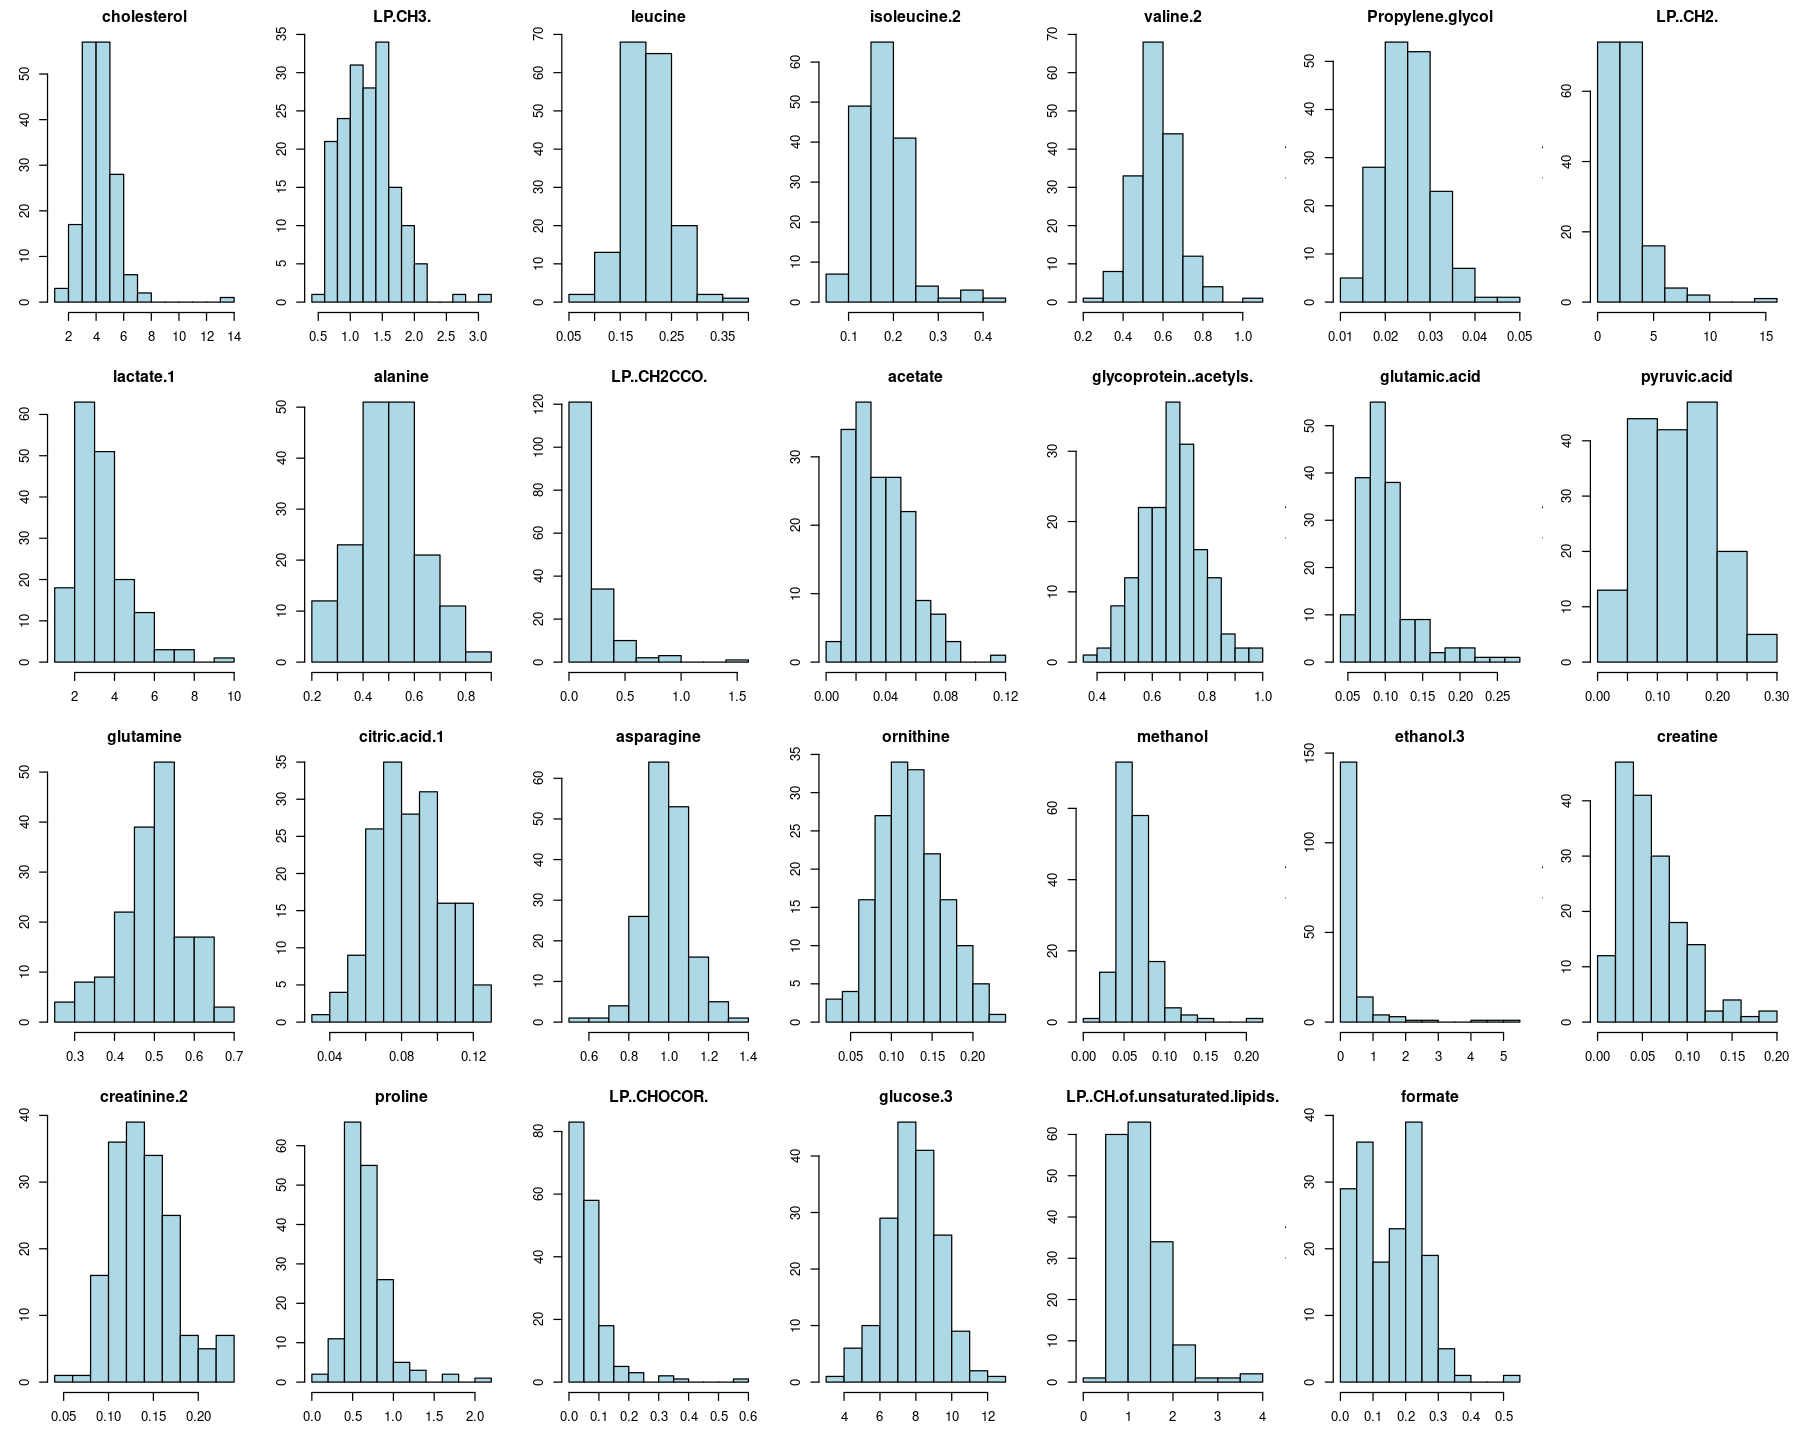

In [178]:

# Data Exploration and Visualization
par(mfrow = c(4, 7), mar = c(3, 3, 2, 1)) # 4x7 grid with larger margins and plot size
for (i in 2:28) { # Assuming metabolite columns start from the 2nd column (adjust if needed)
  hist(data[[i]], main = colnames(data)[i], xlab = "", col = "lightblue")
}


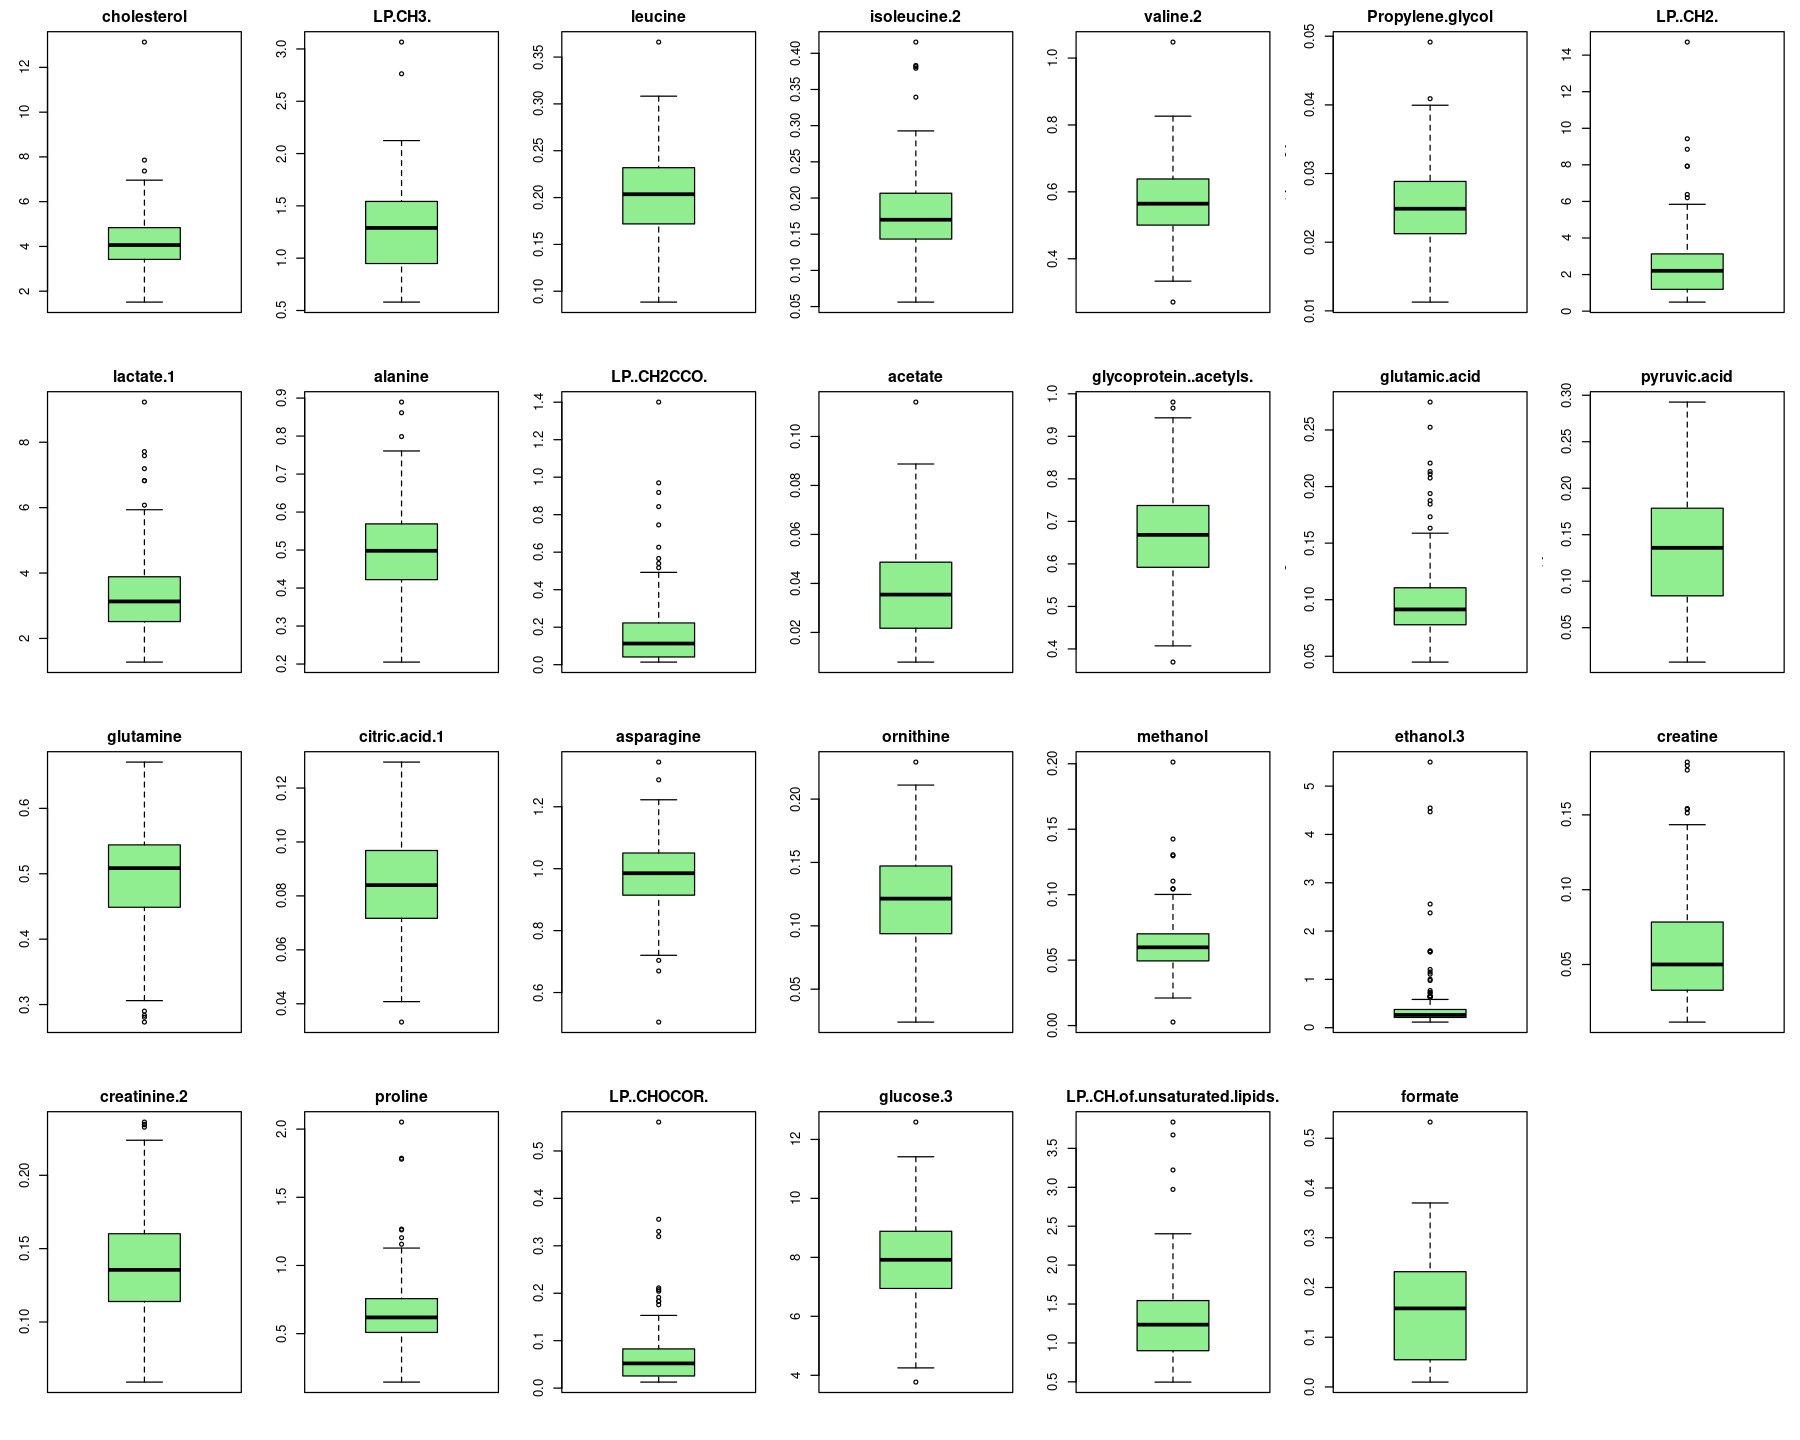

In [177]:
par(mfrow = c(4, 7), mar = c(3, 3, 2, 1)) # Reset the layout for boxplots
for (i in 2:28) {
  boxplot(data[[i]], main = colnames(data)[i], ylab = colnames(data)[i], col = "lightgreen")
}


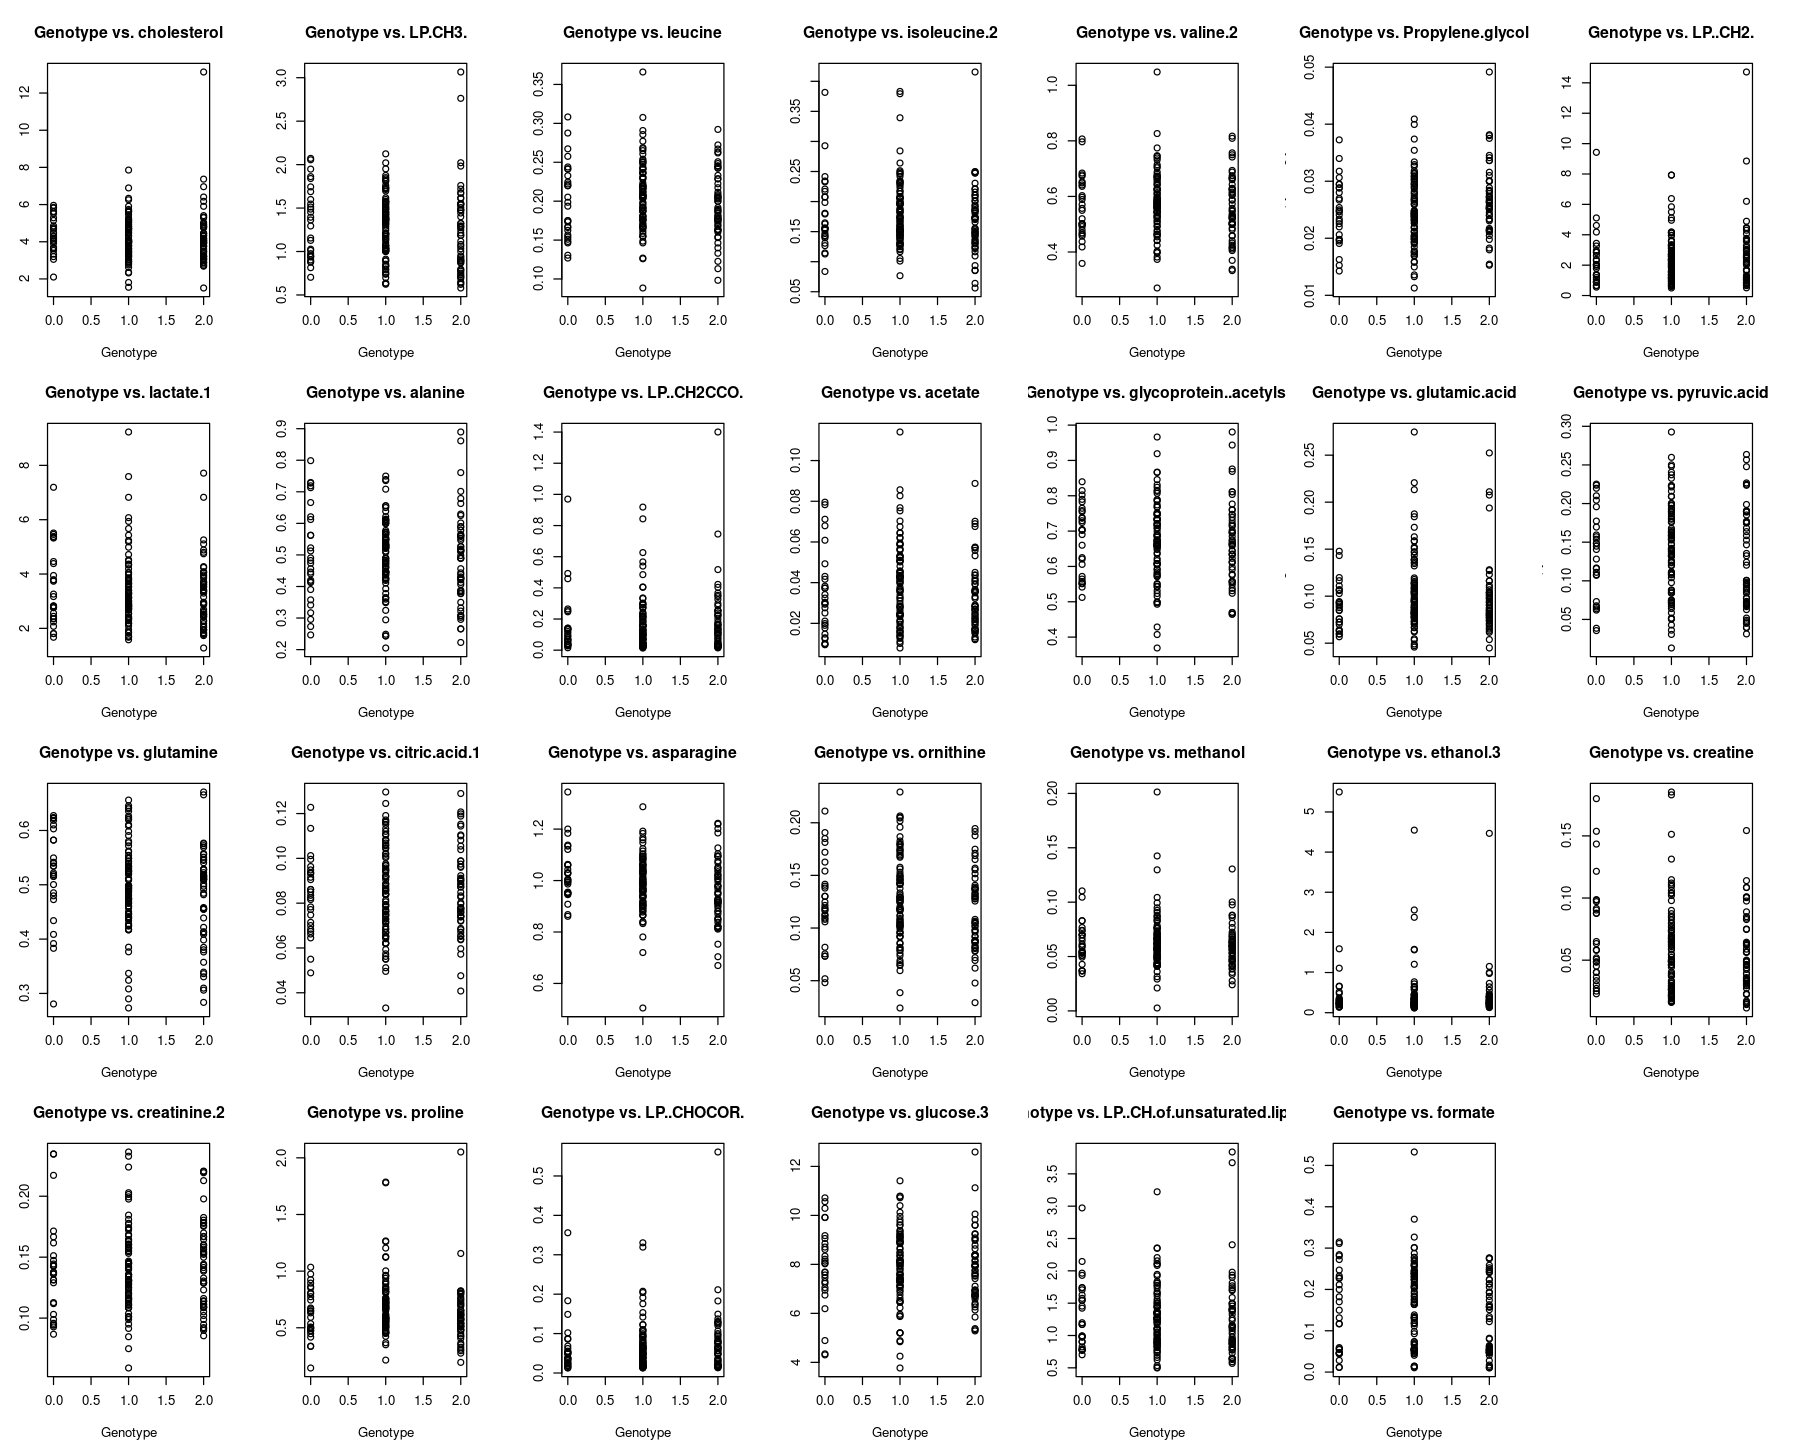

In [176]:
# Data Exploration and Visualization
par(mfrow = c(4, 7),mar = c(4, 3, 4, 3)) # This will create a 4x7 grid of scatter plots for 28 metabolites. Adjust as needed.
for (i in 2:ncol(data)) {
  plot(data$Genotype, data[[i]], main = paste("Genotype vs.", colnames(data)[i]), xlab = "Genotype", ylab = colnames(data)[i])
}

## Correaltion Analysis

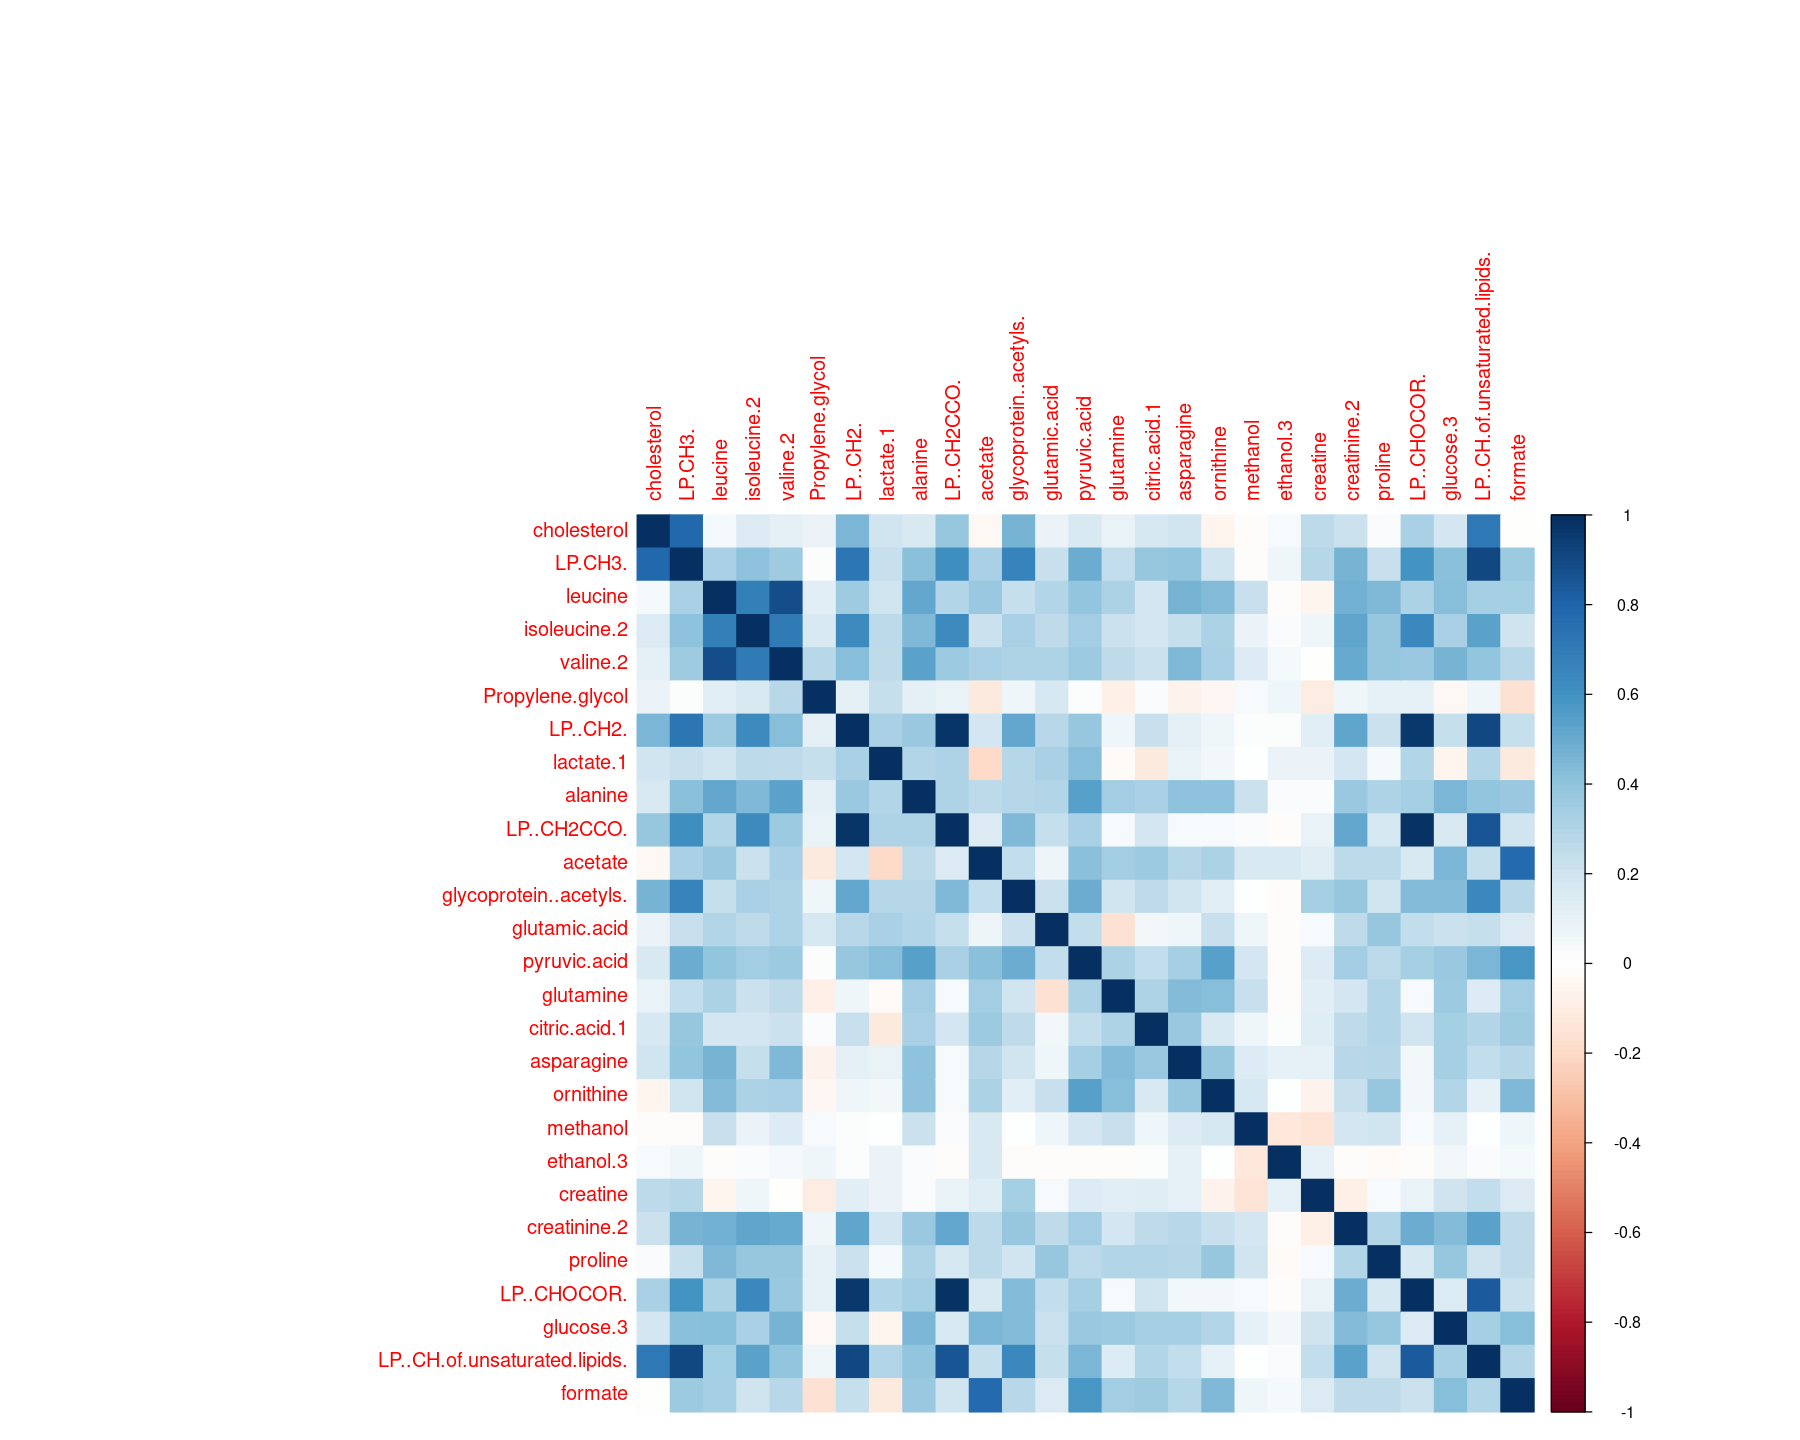

In [179]:
# Calculate the correlation matrix
cor_matrix <- cor(data[, -1]) # Exclude the first column (genotype) from the correlation calculation

# Plot the correlation matrix
corrplot(cor_matrix, method = "color")


## Linear Regression

In [180]:
# Replace "Metabolite_2" with the actual column name of the metabolite of interest
lm_result <- lm(Metabolite_2 ~ Genotype, data = data)
summary(lm_result)


ERROR: Error in eval(predvars, data, env): object 'Metabolite_2' not found


## Principal Component Analysis (PCA)

In [ ]:
# PCA
pca_result <- prcomp(data[, -1], scale. = TRUE) # Exclude the first column (genotype) and scale the data

# Scree plot to visualize the variance explained by each principal component
fviz_eig(pca_result)

# Biplot to visualize the first two principal components
fviz_pca_biplot(pca_result, geom.ind = "point", col.ind = "blue", pointshape = 19,
                geom.var = "arrow", col.var = "red")
